<a href="https://colab.research.google.com/github/abol-hasan/HousepricesPrediction_FeatureEngineering_DataAnalysis/blob/main/final_pipeline_feature_selected_houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Final Pipeline with feature selection ***

In [ ]:
# Installing feature_engine
%pip install feature-engine

     |████████████████████████████████| 180 kB 6.9 MB/s 
     |████████████████████████████████| 9.8 MB 45.5 MB/s 
     |████████████████████████████████| 233 kB 66.8 MB/s 
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('haus_prep.py','wb').write(src)
import haus_prep as prp

Saving haus_prep.py to haus_prep.py


In [ ]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Binarizer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# from feature_engine
from feature_engine.imputation import (MeanMedianImputer, #  replaces missing data by the mean or median value of the variable.
CategoricalImputer # replaces missing data in categorical variables by an arbitrary value or by the most frequent category.
, AddMissingIndicator # adds additional binary variables that indicate if data is missing
)

from feature_engine.encoding import (
    RareLabelEncoder,# groups rare / infrequent categories in a new category called “Rare”, or any other name entered by the user.
    OrdinalEncoder, # replaces categories by ordinal numbers (0, 1, 2, 3, etc).
    # The numbers can be ordered based on the mean of the target per category, or assigned arbitrarily.
)

from feature_engine.transformation import LogTransformer, YeoJohnsonTransformer

from feature_engine.selection import DropFeatures # drops a list of variable(s) indicated by the user from the dataframe.
from feature_engine.wrappers import SklearnTransformerWrapper # Wrapper to apply Scikit-learn transformers to a selected group of variables. 

In [ ]:
# import dataset
df = pd.read_csv('drive/MyDrive/Dataset/train.csv')
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.drop('Id',axis=1, inplace=True)

In [ ]:
X = df.drop(['SalePrice'],axis=1)
Y = df['SalePrice']
X.shape

(1460, 79)

In [ ]:
# split train and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
x_train.shape, x_test.shape

((1314, 79), (146, 79))

In [ ]:
# seperate data based on type. Here Object type
df_object = [col for col in df.select_dtypes(include=['object'])]
df_object.append('MSSubClass')
x_train[df_object] = x_train[df_object].astype('O')
x_test[df_object] = x_test[df_object].astype('O')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
# log alghoritm
y_train = np.log(y_train)
y_test = np.log(y_test)

In [ ]:
feature_selected_from_notebook_feature_selection = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'HalfBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'ScreenPorch', 'SaleCondition', 'YrSold']
len(feature_selected_from_notebook_feature_selection )       

37

In [ ]:
# List of columns for different works on them
col_high_missvalue_cat_fillmissing = ['FireplaceQu']

col_small_missvalue_cat_fillingmostFrequent = ['BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'GarageFinish']

col_numerical_withmissval = ['LotFrontage']

other_cat = ['MSSubClass','MSZoning','LotShape','LandContour','LotConfig','Neighborhood','RoofStyle','Exterior1st','Foundation',
 'CentralAir','Functional','PavedDrive','SaleCondition']

time_col = ['YearRemodAdd']
ref_col = 'YrSold'

col_log_trans = ["LotFrontage", "1stFlrSF", "GrLivArea"]

skewed = ['ScreenPorch']

qual_col = ['ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu']

exposure_col = ['BsmtExposure']

finish_cols = ['BsmtFinType1']

gar_col = ['GarageFinish']

# map dictionary
quality_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}
exposure_mapp = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
finish_mapp = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
garage_mapp = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

In [ ]:
# new xtrain and xtest
x_train = x_train[feature_selected_from_notebook_feature_selection]
x_test = x_test[feature_selected_from_notebook_feature_selection]

# **Creating Pipeline**

In [ ]:
pip = Pipeline([('missing_cat_imput', CategoricalImputer(imputation_method='missing', variables=col_high_missvalue_cat_fillmissing)),
                ('freq_cat_imput', CategoricalImputer(imputation_method='frequent', variables=col_small_missvalue_cat_fillingmostFrequent))
                ,('col_indicator', AddMissingIndicator(variables=col_numerical_withmissval)),
                ('fillmean_imput', MeanMedianImputer(imputation_method='mean', variables=col_numerical_withmissval)),
                ('diff_year', prp.AlgebricImputer(time_col, ref_col)),
                ('drop_features', DropFeatures(features_to_drop=[ref_col])), 
                ('log_Trf', LogTransformer(variables=col_log_trans)), 
                ('binarize_to_1_0', SklearnTransformerWrapper(transformer=Binarizer(),variables=skewed)),
                ('observ_rare', RareLabelEncoder(tol=0.01, n_categories=1, variables=other_cat)),
                ('encode_categotical_order', OrdinalEncoder(encoding_method='ordered',variables=other_cat)),
                ('quality_col', prp.Mapping(qual_col, quality_map)),
                ('exposure_col', prp.Mapping(exposure_col, exposure_mapp)),
                ('finish_cols', prp.Mapping(finish_cols, finish_mapp)),
                ('gar_col', prp.Mapping(gar_col, garage_mapp)),
                ('Scaler', MinMaxScaler()),
                ('clf', Lasso(alpha=0.001, random_state=0))])

In [ ]:
pip.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('missing_cat_imput',
                 CategoricalImputer(fill_value='Missing', ignore_format=False,
                                    imputation_method='missing',
                                    return_object=False,
                                    variables=['FireplaceQu'])),
                ('freq_cat_imput',
                 CategoricalImputer(fill_value='Missing', ignore_format=False,
                                    imputation_method='frequent',
                                    return_object=False,
                                    variables=['BsmtQual', 'BsmtExposure',
                                               '...
                ('gar_col',
                 Mapping(features=['GarageFinish'],
                         mapdict={'Fin': 3, 'Missing': 0, 'NA': 0, 'RFn': 2,
                                  'Unf': 1})),
                ('Scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('clf',
       

In [ ]:
pred_lasso = pip.predict(x_train)

print(f'for train -> mean sqaure error:{mean_squared_error(np.exp(y_train), np.exp(pred_lasso))}')
print(f'for train -> root mean sqaure error:{mean_squared_error(y_true=np.exp(y_train), y_pred=np.exp(pred_lasso), squared=False)}')
print(f'for train -> r2_score:{r2_score(np.exp(y_train), np.exp(pred_lasso))}')

pred_lasso_test = pip.predict(x_test)
print(f'for test -> mean sqaure error:{mean_squared_error(np.exp(y_test), np.exp(pred_lasso_test))}')
print(f'for test -> root mean sqaure error:{mean_squared_error(np.exp(y_test), np.exp(pred_lasso_test), squared=False)}')
print(f'for test -> r2_score:{r2_score(np.exp(y_test), np.exp(pred_lasso_test))}')

for train -> mean sqaure error:781396630.903134
for train -> root mean sqaure error:27953.472609018256
for train -> r2_score:0.8748530315439078
for test -> mean sqaure error:1060769014.933313
for test -> root mean sqaure error:32569.449103927334
for test -> r2_score:0.8456415571208442


In [ ]:
joblib.dump(pip, '/content/drive/MyDrive/hauspricefolder/pip.joblib')

['/content/drive/MyDrive/hauspricefolder/pip.joblib']

# **Scoring with new dataset**

In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/Dataset/test.csv')
data_test.shape

(1459, 80)

In [ ]:
data_test['LotFrontage'].isnull().sum()

227

In [ ]:
data_test.drop('Id', axis=1, inplace=True)

In [ ]:
data_test = data_test[feature_selected_from_notebook_feature_selection]
data_test.shape

(1459, 37)

In [ ]:
data_test['LotFrontage']

0        80.0
1        81.0
2        74.0
3        78.0
4        43.0
        ...  
1454     21.0
1455     21.0
1456    160.0
1457     62.0
1458     74.0
Name: LotFrontage, Length: 1459, dtype: float64

In [ ]:
data_test['MSSubClass'] = data_test['MSSubClass'].astype('O')


In [ ]:
data_test['LotFrontage']

0        80.0
1        81.0
2        74.0
3        78.0
4        43.0
        ...  
1454     21.0
1455     21.0
1456    160.0
1457     62.0
1458     74.0
Name: LotFrontage, Length: 1459, dtype: float64

In [ ]:
# find if new columns there are. Three filled lists are checked, because they will be filled in pipeline and if new columns are not
# in them and still have missing values
new_col  = [col for col in feature_selected_from_notebook_feature_selection if col not in 
            col_high_missvalue_cat_fillmissing + col_small_missvalue_cat_fillingmostFrequent +
            col_numerical_withmissval and data_test[col].isnull().sum() > 0]

In [ ]:
new_col

['MSZoning',
 'Exterior1st',
 'BsmtFullBath',
 'KitchenQual',
 'Functional',
 'GarageCars',
 'GarageArea']

In [ ]:
data_test[new_col].isnull().mean().sort_values(ascending=False)

MSZoning        0.002742
Functional      0.001371
BsmtFullBath    0.001371
GarageArea      0.000685
GarageCars      0.000685
KitchenQual     0.000685
Exterior1st     0.000685
dtype: float64

In [ ]:
'''
isnan = data_test[new_col].isnull()
rownan = isnan.any(axis=1)
ind = data_test[rownan].index
d = data_test.drop(ind)
'''

In [ ]:
data_test.dropna(subset=new_col, inplace=True)
print(data_test.shape)

(1449, 37)


In [ ]:
pred_for_data_test = pip.predict(data_test)

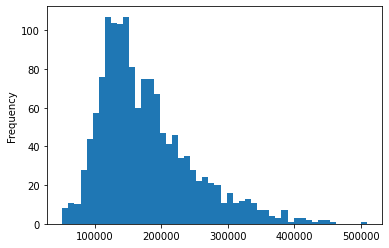

In [ ]:
pd.Series(np.exp(pred_for_data_test)).plot.hist(bins=50)